<a href="https://colab.research.google.com/github/brach22/MachineLearning340/blob/main/Copy_of_Week6_InClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning with Generated Data Sets

CSC/DSC 340 Week 6 In-Class and Post-Class Homework

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: September 12, 2023

Last Modified: September 12, 2023

The goal of this notebook is to gain experience with two different unsupervised learning algorithms, using generated data sets so we can control the number of features and classes in each data set. Note that this assignment will count jointly as the in-class and post-class for this week.

**EXERCISE 0:** Add your imports to the below code cell.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge

# Week 6
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

**EXERCISE 1:**  Using `make_blob`, setting the number of features to 2 but increasing the number of clases from 1 to 10, make a plot of the accuracy of the ridge classifier in successfully classifying the generated data. Use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) as your classifier for all assignments in this notebook. You may want to perform a brief hyperparameter tuning at the start of this to adjust the hyperparameters.

In [ ]:
ridge = Ridge()

random_search = RandomizedSearchCV(ridge, distributions,\
                                   scoring='neg_mean_squared_error', n_iter=5000)
random_search.fit(X_train, y_train)

print(random_search.best_params_, random_search.best_score_)

# =================
ridge = Ridge(alpha=random_search.best_params_['alpha'])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

err = MSE(y_pred, y_test)
print("MSE:", err)
print('CHOSEN ALPHA:', random_search.best_params_['alpha'])

X_test_plot = scaler.inverse_transform(X_test)

plt.scatter(X_test_plot[:,1],y_test,label='True')
plt.scatter(X_test_plot[:,1],y_pred,label='Predicted')

In [ ]:
accuracies = []
num_classes_list = list(range(2, 12))
distributions = {'alpha':uniform(loc=0, scale=4)}


for num_classes in num_classes_list:
    X, y = make_blobs(n_samples=500, n_features=2, centers=num_classes)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    random_search = RandomizedSearchCV(RidgeClassifier(), distributions,\
                                   scoring='neg_mean_squared_error', n_iter=5000)
    random_search.fit(X_train, y_train)


    # Support Vector Classifier
    svc = SVC(kernel='linear', C=1.0)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)

    # Ridge Classifer
    clf = RidgeClassifier(alpha=random_search.best_params_['alpha'])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(num_classes_list, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ridge Classifier vs. Number of Classes')
plt.xticks(num_classes_list)
plt.grid(True)
plt.show()

**EXERCISE 2:** **EXERCISE 4:** Using SVC and `make_blobs` create a data set which as 2 labels, but increase the number of features from 1 to 20. Create a plot of that shows how the accuracy of the classification changes as the number of features in the data set changes.

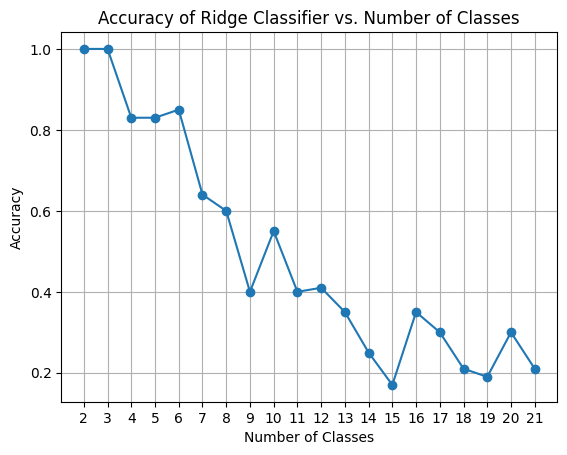

In [12]:
accuracies = []
num_classes_list = list(range(2, 22))

for num_classes in num_classes_list:
    X, y = make_blobs(n_samples=500, n_features=2, centers=num_classes)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Support Vector Classifier
    svc = SVC(kernel='linear', C=1.0)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)

    # Ridge Classifer
    clf = RidgeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(num_classes_list, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ridge Classifier vs. Number of Classes')
plt.xticks(num_classes_list)
plt.grid(True)
plt.show()

**EXERCISE 3:** How do the above results compare to the ridge classifier results from the pre-class? Which classifier seems to be better?

**EXERCISE 4:** (a) Create a data set using `make_blob` that has three classes and two features. Instead of passing "3" to the `centers` attribute, pass it the locations in the 2D feature space of the clusters. (b) Train a k-means algorithm on the data assuming three clusters. (c) Extract the predicted centers from the k-means algorithm and compare them to the true centers.

**EXERCISE 5:** Create 4 data sets with `make_classifications`. The first data set should have 2 features with 2 being informative, the second should have 4 features with 2 being informative, the third should have 8 features with 2 being informative, and the fourth should have 16 features with 2 being informative. Each data set should have three classes. We will be using these data sets for the next few exercises.

**EXERCISE 6:** Train a SVC algorithm on each of the above data sets. Create a plot of accuracy on the y axis and informative features / total features on the x axis. Is there a difference between the different data sets?

**EXERCISE 7:** Using a combination of elbow plots and silhouette plots, find the number of clusters k-means thinks the above four data sets should be split into. Does this match the number of clusters each data set was made with?

**EXERCISE 8:** Using a Pipeline, set up a workflow that scales the data, performs PCA on it, and then trains a SVC with the data. Use this Pipeline and `RandomizedSearchCV` to determine the optimal number of components and the values of the hyperparameters for SVC. Do this for all four data sets.

**EXERCISE 9:** How many components are needed to keep 95% of the variance in each of the data sets?

**EXECISE 10:** Does smaller ratio of informative features to total features negatively impact classification? Does PCA help improve the results?

**EXERCISE 11:** Using the steps taken by the PCA algorithm detailed in the lecture notes, create your own PCA algorithm that finds the new components (you should not use the Scikit-Learn implementation here). Create a generated data set that has any form you like. Compare the components given by Scikit-Learn's PCA to your function if you ask it to reduce the data set down to two

## Notebook Submission

Once you have completed this notebook, submit it on D2L.  Convert the notebook to a PDF using File > Print > Save as PDF.  Make sure all code outputs including graphs are visible on the PDF.